In [1]:
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import figure 

# Maze

### Distance Units: cm

In [2]:
class Block:
    
    def __init__(self, bottom_left, bottom_right, top_right, top_left):
        self.points = [
            bottom_left,
            bottom_right,
            top_right,
            top_left,
            bottom_left
        ]
    
    def intersects(self, other_block):

        if min(self.getX()) > max(other_block.getX()) or max(self.getX()) < min(other_block.getX()):
            return False

        if min(self.getY()) > max(other_block.getY()) or max(self.getY()) < min(other_block.getY()):
            return False

        else:
            return True        
    
    def getX(self):
        
        return [p[0] for p in self.points]
    
    def getY(self):
        
        return [p[1] for p in self.points]
        
class Maze:
    
    def __init__(self, size = (10,10), blocks = [], robot = None):
        
        self.size = size
        self.aspect_ratio = self.size[1] / self.size[0]
        self.blocks = blocks
        self.robot = robot
        self._createMazeWalls()
        
    def _createMazeWalls(self):
        
        thickness = 1 # cm
        
        wall_b = Block((-thickness,-thickness), (self.size[0]+thickness, -thickness), (self.size[0]+thickness, 0), (-thickness,0))
        wall_t = Block((-thickness, self.size[1]), (self.size[0]+thickness, self.size[1]), (self.size[0]+thickness, self.size[1]+thickness), (-thickness,self.size[1]+thickness))
        wall_l = Block((-thickness,0), (0,0), (0, self.size[1]), (-thickness,self.size[1]))
        wall_r = Block((self.size[0],0), (self.size[0]+thickness,0), (self.size[0]+thickness, self.size[1]), self.size)
        
        for wall in [wall_b, wall_t, wall_l, wall_r]:
            self.blocks.append(wall)
        
    def robotIntersects(self):
        
        # Check with walls
        for wall in self.blocks:
            if self.robot.intersects(wall):
                return True
            
        return False
    
    def show(self, size = 5):
        
        plot.rcParams["figure.figsize"] = (size,size*self.aspect_ratio)
        
        # Border
        plot.ylim(-1,self.size[1]+1)
        plot.xlim(-1,self.size[0]+1)
        plot.plot([
            0, 
            self.size[0],  
            self.size[1],  
            0,
            0],
            [0,
             0,
             self.size[1],
             self.size[1],
             0
            ], color = "orange", label="Maze")
        
        # Walls
        for block in self.blocks:
            plot.plot(block.getX(), block.getY(), color='orange')
            plot.fill_between(block.getX(), block.getY(), facecolor='orange')
            
        # Robot
        if self.robot:
            plot.plot(self.robot.getX(), self.robot.getY(), label="Robot", color='blue')
        
        
        plot.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plot.show()
    
    def __repr__(self):
        self.show()
        return 'None'

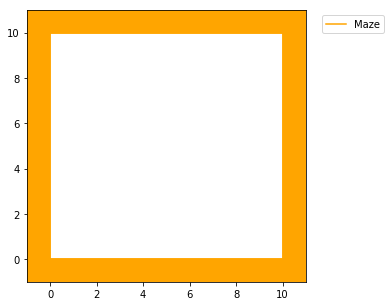

In [3]:
block = Block((0,0), [1,0], [1,1], [0,1])
maze = Maze(blocks=[])
maze.show()

# Robot

In [150]:
import numpy as np
import math
from math import sin, cos

class Robot(Block):
    
    '''
    Omni directional robot
    '''
    
    def __init__(self, size, origin = (0,0), motors = [], distance_sensors = []):
        
        super().__init__([0,0], [size[0], 0], [size[0], size[1]], [0, size[1]])
        self.size = size #x,y
        self.motors = motors
        self.distance_sensors = distance_sensors
        self.centroid = self.calcCentroid()
        self.translate(origin[0], origin[1])
    
    def calcCentroid(self, set_points = True):
        xs = [p[0] for p in self.points[:-1]]
        ys = [p[1] for p in self.points[:-1]]
        
        if set_points:
            self.centroid = sum(xs)/4, sum(ys)/4
        
        return sum(xs)/4, sum(ys)/4
    
    def translate(self, translate_x, trasnlate_y, set_points = True, eval_points = None):
        
        if eval_points:
            move_x = [(p[0]+translate_x, p[1]) for p in eval_points]
        else:
            move_x = [(p[0]+translate_x, p[1]) for p in self.points]
        
        move_y = [(p[0], p[1]+trasnlate_y) for p in move_x]
        
        if set_points:
            self.points = move_y
            self.calcCentroid()
        
        return move_y
    
    def rotate(self, theta, rad=False, set_points=True):
        
        '''
        Rotate around centroid. 
        theta in rad
        '''
        if not rad:
            theta = math.radians(theta)
            
        matrix = [
            [cos(theta), -1*sin(theta)],
            [sin(theta), cos(theta)]
        ]
        
        # 1 - Translate points
        center = self.centroid
        points = self.translate(-center[0], -center[1], False)
        
        # 2 - Rotate
        points = [np.matmul(matrix, point) for point in points]
        
        # 3 - Translate back
        points = self.translate(center[0], center[1], False, points)
        
        if set_points:
            self.points = points
            self.calcCentroid()
        
        return points

In [139]:
block1 = Block((0,3), [10,3], [10,4], [0,4])
block2 = Block((0,6), [10,6], [10,7], [0,7])

maze = Maze(size = (10,10), blocks=[block1, block2])

### Intersections

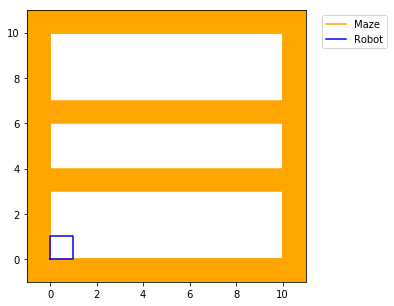

True
(0.5, 0.5)


In [140]:
maze.robot = Robot((1,1))
maze.show()
print(maze.robotIntersects())
print(maze.robot.centroid)

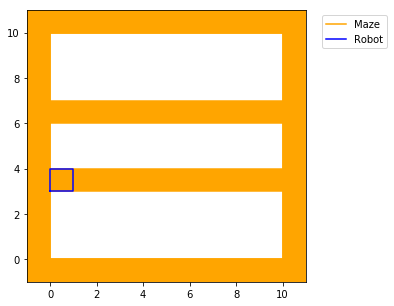

True
(0.5, 3.5)


In [141]:
maze.robot.translate(0,3)
maze.show()
print(maze.robotIntersects())
print(maze.robot.centroid)

### Move

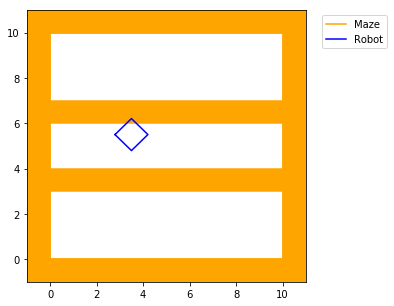

In [149]:
maze.robot.rotate(-45)
maze.robot.translate(3,2)
maze.show()

In [ ]:
class Wheel:
    def __init__(self, wheel_radius):
        self.wheel_radius = wheel_radius
    

## Sensor

In [8]:
class Sensor:
    
    def __init__(self, mount_pos, mount_direction):
        
        self.mount_pos = mount_pos
        self.mount_direction = mount_direction